## Reduced Row Echelon form

In [1]:
import numpy as np
import sympy

In [2]:
# MATLAB code
# function [A,jb] = rref(A,tol)
# %RREF Reduced row echelon form.
# % R = RREF(A) produces the reduced row echelon form of A.
# %
# % [R,jb] = RREF(A) also returns a vector, jb, so that:
# % r = length(jb) is this algorithm’s idea of the rank of A,
# % x(jb) are the bound variables in a linear system, Ax = b,
# % A(:,jb) is a basis for the range of A,
# % R(1:r,jb) is the r-by-r identity matrix.
# % [R,jb] = RREF(A,TOL) uses the given tolerance in the rank tests.

In [3]:
def RREF(matrix):
    # m : the number of rows
    # n : the number of columns
    m, n = matrix.shape
    A = matrix.astype(float).copy()
    
    pcol_list = []
    prow = -1
    pcol = -1
    
    # For each columns
    while True :
        
        prow += 1
        pcol += 1
        
        if prow == m or pcol == n : break
        
        pid = np.argmax(abs(A[prow:,pcol])) + prow
        
        # Get pivot value
        pivot = float(A[pid, pcol])
        
        if pivot == 0 :
            
            prow -= 1
            continue
            
        else :
            
            pcol_list.append(pcol)
            
            A[prow,:], A[pid,:] = A[pid,:].copy(), A[prow,:].copy()

            # Substitution each rows
            for i in range(m):
                if prow == i : continue
                mul = float(A[i,pcol])/pivot
                A[i,:] = A[i,:] - A[prow,:]*mul

            A[prow,:] /= pivot

            A = np.around(A, 4)
        
    return A, pcol_list

In [4]:
A = np.array([[1,3,3,2],[0,1,3,1],[0,1,3,0]])

In [5]:
RREF(A)

(array([[ 1.,  0., -6.,  0.],
        [ 0.,  1.,  3.,  0.],
        [-0., -0., -0.,  1.]]), [0, 1, 3])

In [6]:
sympy.Matrix(A).rref()

(Matrix([
 [1, 0, -6, 0],
 [0, 1,  3, 0],
 [0, 0,  0, 1]]), (0, 1, 3))

In [7]:
B = np.array([[1,3,3],[0,1,2]])

In [8]:
RREF(B), sympy.Matrix(B).rref()

((array([[ 1.,  0., -3.],
         [ 0.,  1.,  2.]]), [0, 1]), (Matrix([
  [1, 0, -3],
  [0, 1,  2]]), (0, 1)))

## Paricular solution of Ax=b

In [9]:
# MATLAB
# function x = partic_sol(A, b)
# [m, n] = size(A);
# [R, pivcol] = rref([A b]);
# r = length(pivcol);
# if max(pivcol) == n+1
# x = [];
# else
# x = zeros(n, 1);
# d = R(:, n+1);
# x(pivcol) = d(1:r);
# end

In [10]:
def ParitalSol(matrix, b) :
    m, n = matrix.shape
    R, pivcol = RREF(np.concatenate((matrix, b.T), axis=1))
    
    if max(pivcol) == n+1 :
        
        print("No Solution")
        return []
    
    else :    
        
        r = len(pivcol)
        return R[:, n][0:r]

In [11]:
A = np.array([[1, 0], [1, -1]])
b = np.array([[2, 3]])

In [12]:
ParitalSol(A, b)

array([ 2., -1.])

## Matrix Operation

In [13]:
import scipy
from scipy import matrix
import numpy as np

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

### Scaling

In [15]:
A = matrix([1,0]).T

In [16]:
scale = matrix([[1/2, 0], [0, 1/2]])

In [17]:
scale*A

matrix([[0.5],
        [0. ]])

### Rotation

In [18]:
A = matrix([1,0]).T

In [19]:
rotation = matrix([[0, -1], [1, 0]]) # 90도 회전

In [20]:
rotation*A

matrix([[0],
        [1]])

### Reflection

In [21]:
A = matrix([1,0]).T

In [22]:
reflection = matrix([[-1, 0], [0, -1]])

In [23]:
reflection*A

matrix([[-1],
        [ 0]])

### Vector Plot

In [24]:
def plot_vector(vector) :
    origin = matrix([0, 0]).T
    plt.figure(figsize=(5,5))
    plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

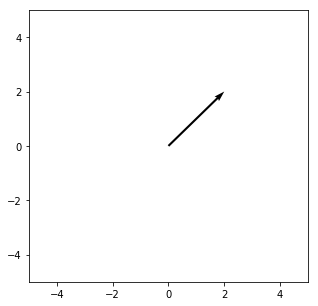

In [25]:
vector = matrix([2, 2]).T
plot_vector(vector)

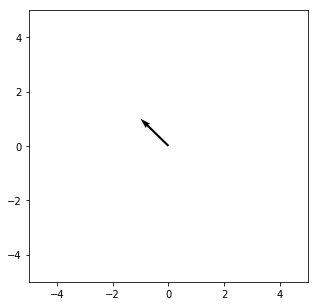

In [26]:
vector_new = rotation*scale*vector
plot_vector(vector_new)